In [2]:
from PIL import Image
import requests
from io import BytesIO
import torch
from torchvision import transforms
from torchvision.transforms.functional import to_pil_image
from torchmetrics.multimodal import CLIPScore


c:\Users\Admin\anaconda3\envs\llmblueprint\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# load clip model
clip_metric = CLIPScore(model_name_or_path="openai/clip-vit-base-patch16").cuda()

c:\Users\Admin\anaconda3\envs\llmblueprint\lib\site-packages\huggingface_hub\file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [5]:
def get_clip_metric(torch_image, bbox, target_text="A graceful white cat gracefully stretches, showing off its fluffy, pristine fur."):
        
    # target_region = crop_image(torch_image, bbox)
    target_region = torch_image
    if target_region.max()<100:
        target_region = (target_region*(255)).to(torch.uint8)
    score = clip_metric(target_region, target_text)
    return score/100

# def crop_image(img, bbox):
#     if img.shape[0]!=3:
#         img=img.permute(2,0,1)
#     x,y,w,h = bbox[0], bbox[1], bbox[2], bbox[3]
#     cropped_region = img[:,y:y+h,x:x+w] #img[:,x:x+w,y:y+h]
#     return cropped_region #torchvision.transforms.Resize((512,512))(cropped_region)

### Livingroom 1

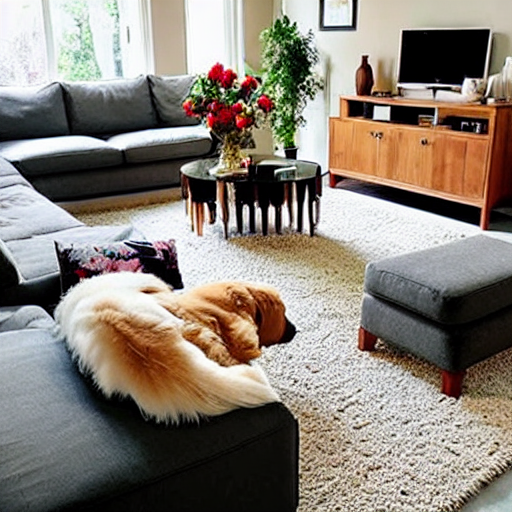

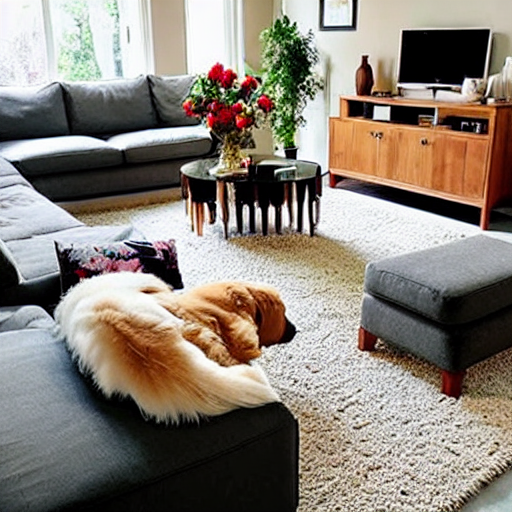

stage 1: tensor(0.2088, device='cuda:0', grad_fn=<DivBackward0>)
stage 2: tensor(0.2088, device='cuda:0', grad_fn=<DivBackward0>)


In [29]:
import yaml

# Load the yaml file
with open('configs/livingroom_1.yaml', 'r') as file:
    config = yaml.safe_load(file)
# Now config is a Python dictionary with your YAML data
prompt_info = config['prompt_info']

stage_1_image = Image.open("./outputs/livingroom/livingroom_1_first_stage.png")
stage_2_image = Image.open("./outputs/livingroom/livingroom_1_second_stage.png")
# Display the image in notebook
display(stage_1_image)
display(stage_2_image)

text_prompt = prompt_info['text_prompt']
torch_image_1 = transforms.ToTensor()(stage_1_image).to('cuda')
torch_image_2 = transforms.ToTensor()(stage_2_image).to('cuda')

score_1 = get_clip_metric(torch_image_1, text_prompt)
score_2 = get_clip_metric(torch_image_2, text_prompt)
print("stage 1:", score_1)
print("stage 2:", score_2)

### Livingroom 2

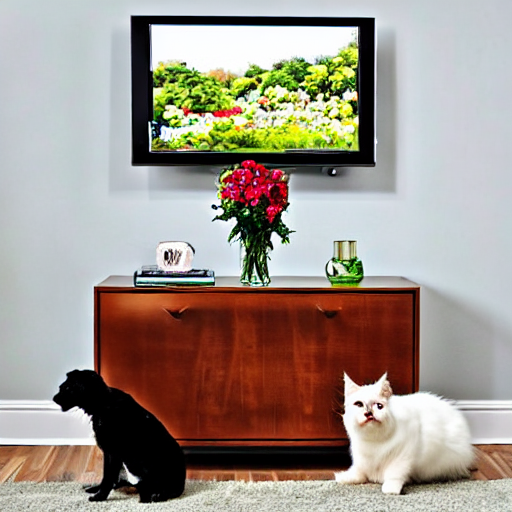

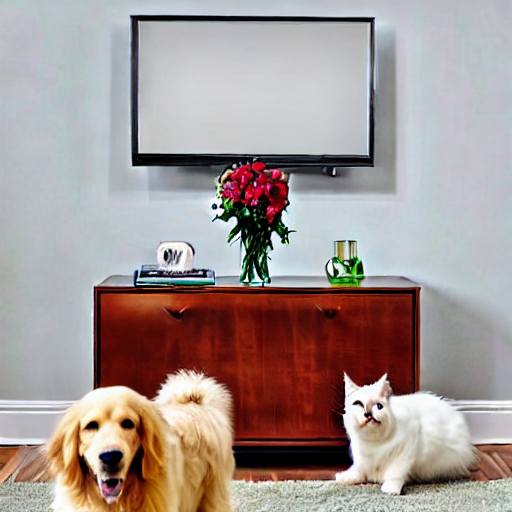

stage 1: tensor(0.2625, device='cuda:0', grad_fn=<DivBackward0>)
stage 2: tensor(0.2365, device='cuda:0', grad_fn=<DivBackward0>)


In [24]:
import yaml

# Load the yaml file
with open('configs/livingroom_1.yaml', 'r') as file:
    config = yaml.safe_load(file)
# Now config is a Python dictionary with your YAML data
prompt_info = config['prompt_info']

stage_1_image = Image.open("./outputs/livingroom/livingroom_2_first_stage.png")
stage_2_image = Image.open("./outputs/livingroom/livingroom_2_second_stage.png")
# Display the image in notebook
display(stage_1_image)
display(stage_2_image)

text_prompt = prompt_info['text_prompt']
torch_image_1 = transforms.ToTensor()(stage_1_image).to('cuda')
torch_image_2 = transforms.ToTensor()(stage_2_image).to('cuda')

score_1 = get_clip_metric(torch_image_1, text_prompt)
score_2 = get_clip_metric(torch_image_2, text_prompt)
print("stage 1:", score_1)
print("stage 2:", score_2)